# K - Nearest Neighbors

## Import & Data

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


---
## EDA

In [148]:
df.iloc[:20].style.background_gradient(cmap="viridis")

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [149]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [151]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [152]:
df.duplicated().sum()
# Burada Duplicate baktık çünkü ID verisi var

0

In [153]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

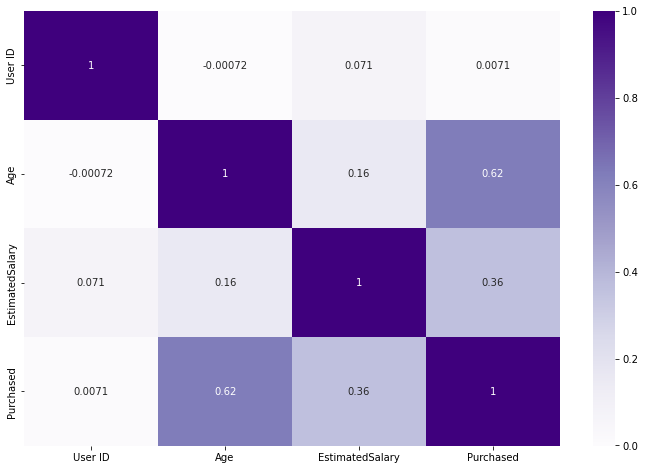

In [154]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="Purples")

<AxesSubplot:xlabel='Purchased', ylabel='count'>

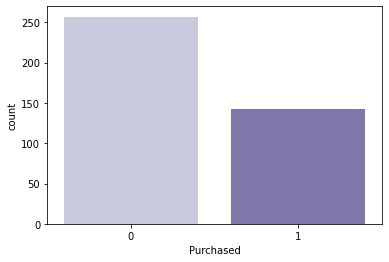

In [155]:
sns.countplot(x = "Purchased", data=df, palette="Purples")

In [156]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

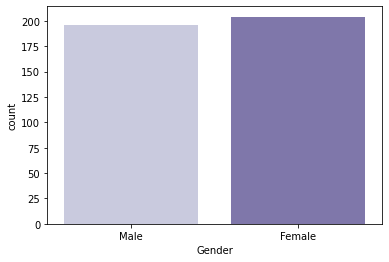

In [157]:
sns.countplot(x = "Gender", data=df, palette="Purples")

In [158]:
map_gender = {
    "Male" : 1,
    "Female" : 0
}

In [159]:
df["Gender"] = df["Gender"].map(map_gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [161]:
df.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


In [163]:
df[["Gender", "Purchased"]].value_counts()

Gender  Purchased
1       0            130
0       0            127
        1             77
1       1             66
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

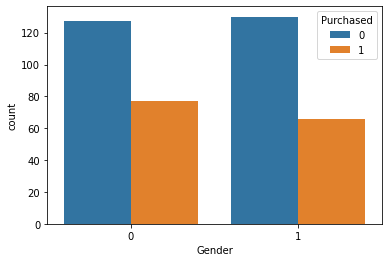

In [162]:
sns.countplot(x="Gender", data=df, hue="Purchased")

<Figure size 720x288 with 0 Axes>

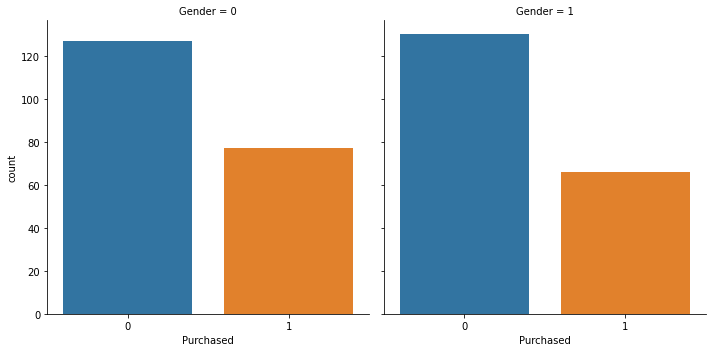

In [164]:
plt.figure(figsize=(10, 4))
sns.catplot(x="Purchased", col= "Gender", kind="count",data=df)

In [165]:
pd.crosstab(df.Gender,df.Purchased, normalize= "index")

Purchased,0,1
Gender,,
0,0.622549,0.377451
1,0.663265,0.336735


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

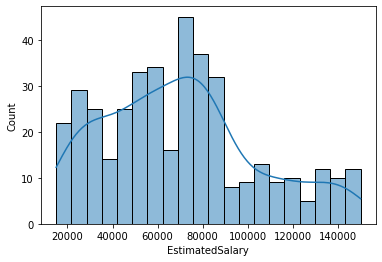

In [166]:
sns.histplot(df["EstimatedSalary"], kde=True, bins=20)

<AxesSubplot:xlabel='Age', ylabel='Count'>

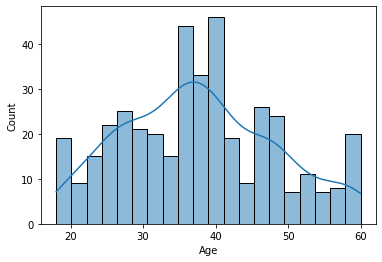

In [167]:
sns.histplot(df["Age"], kde=True, bins=20)

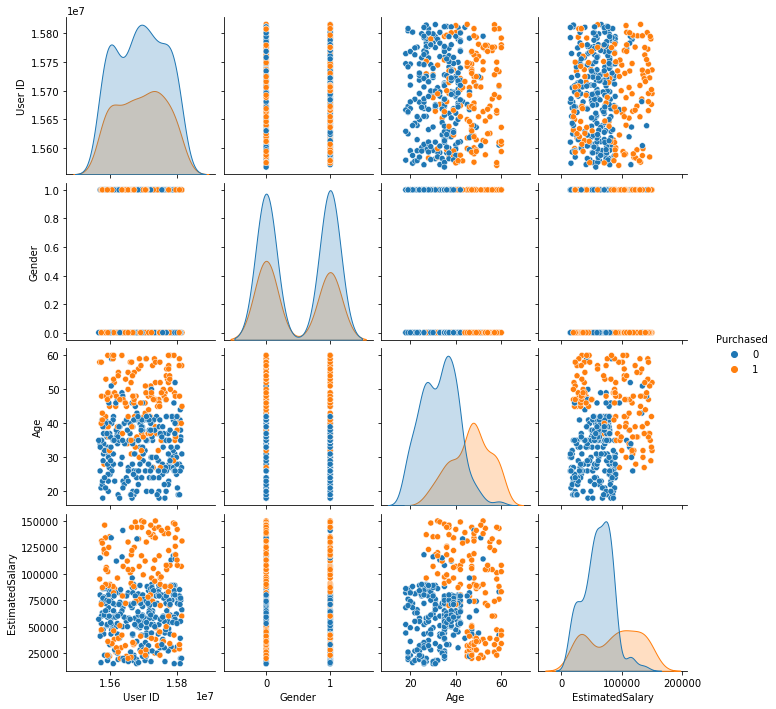

In [168]:
sns.pairplot(df, hue="Purchased")

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

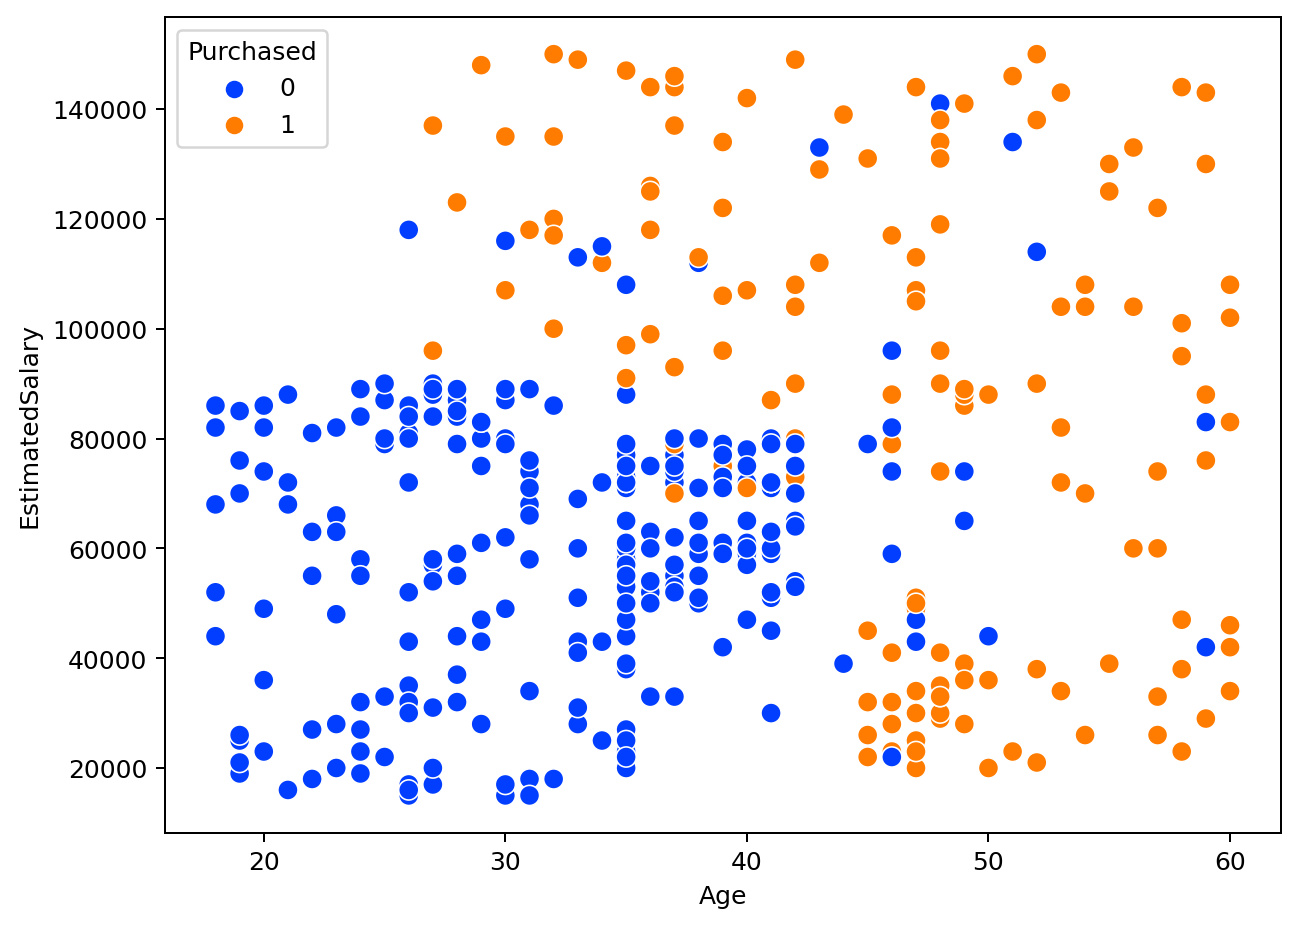

In [169]:
plt.figure(figsize=(8,6), dpi=180)
sns.scatterplot(x="Age", y="EstimatedSalary", data=df, hue="Purchased", s=65, palette="bright")

---
## Train Test Split

In [170]:
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size= 0.25, random_state = 9)

---
## Modelleme

In [173]:
from sklearn.preprocessing import StandardScaler

In [174]:
scaler = StandardScaler()

In [175]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [176]:
from sklearn.neighbors import KNeighborsClassifier

In [177]:
knn = KNeighborsClassifier(n_neighbors=2)

In [178]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [179]:
pred = knn.predict(scaled_X_test)

---
## Model Değerlendirme

In [180]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

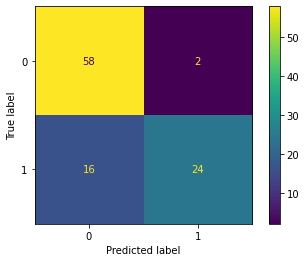

In [181]:
ConfusionMatrixDisplay.from_estimator(knn,scaled_X_test,y_test)

In [182]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87        60
           1       0.92      0.60      0.73        40

    accuracy                           0.82       100
   macro avg       0.85      0.78      0.80       100
weighted avg       0.84      0.82      0.81       100



---
## Dirsek Metodu

In [183]:
hata_oran = []

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    pred_elbow = knn.predict(scaled_X_test)

    err = 1-accuracy_score(y_test, pred_elbow)
    hata_oran.append(err)

Text(0.5, 0, 'K Değeri')

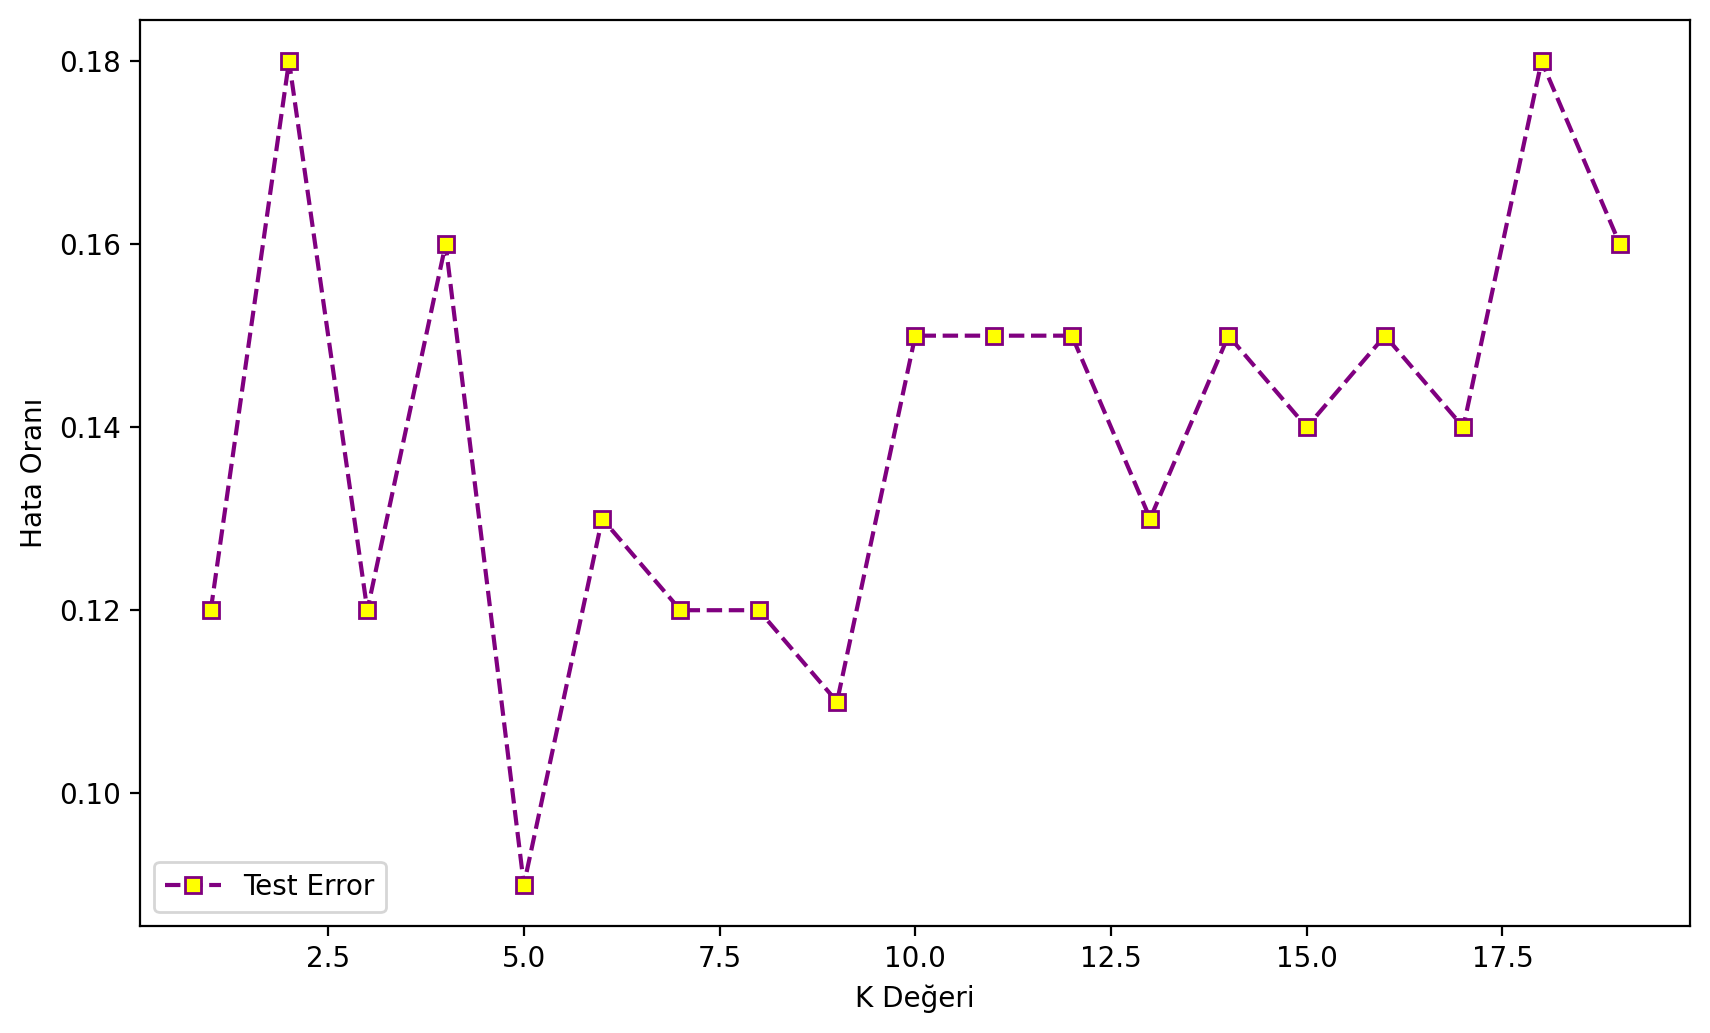

In [184]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),hata_oran,color="purple", linestyle="dashed" ,
 marker="s" , markerfacecolor="yellow",label='Test Error')
plt.legend()
plt.ylabel('Hata Oranı')
plt.xlabel("K Değeri")

In [185]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)

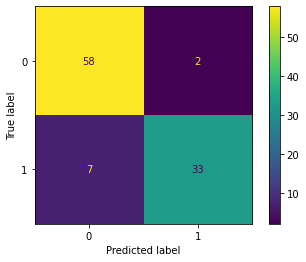

In [186]:
ConfusionMatrixDisplay.from_estimator(knn,scaled_X_test,y_test)

In [187]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        60
           1       0.94      0.82      0.88        40

    accuracy                           0.91       100
   macro avg       0.92      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



# **https://www.youtube.com/watch?v=7XVKjbt1xQw**